In [1]:
from sklearn.model_selection import KFold
import itertools, time, datetime, functools
from joblib import Parallel, delayed
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score
import sklearn.base

from sklearn import tree
import pickle as pkl

from  classifiers import *
from ann import *
from credit_default import CreditDefault_ANN
import mlrose_hiive as mr
from mlrose_hiive.algorithms.decay import GeomDecay
from loader import DataLoader
from test_harness import run_grid


In [4]:
def load(filename):
    with open(filename, 'rb') as f:
        return pkl.load(f)

In [6]:
ga = load('ga-max.pkl')
sa = load('sa.pkl')
rhc = load('rhc.pkl')
gd = load('gd.pkl')

In [7]:
def show_res(res):
    keys, res2 = res
    for k in res2:
        print(k, res2[k][1], res2[k][2])

In [23]:
show_res(ga)
show_res(gd)
show_res(sa)
show_res(rhc)

(0.5,) 0.439330934915666 0.437570303712036
(1,) 0.6611257854678002 0.6532789727221535
(2,) 0.6367980906718621 0.6367926055426056
(2.5,) 0.526851863633429 0.5429749113043112
(3,) 0.5652543260392631 0.5638931968086099
(0.05,) 0.6308768516574497 0.61657203307498
(0.1,) 0.6512016303246771 0.6366898182947974
(0.2,) 0.6694598025980465 0.6600270664441787
(0.3,) 0.670630597461563 0.6648222087628411
(0.4,) 0.6757749712973593 0.6620464962173506
(0.5,) 0.6437888341934883 0.6322018592388244
(1, 0.8) 0.607502924668428 0.5986063612863863
(1, 0.9) 0.588180217944941 0.5718584917286635
(1, 0.99) 0.6186963373055872 0.616128526162589
(1, 0.999) 0.5437981961961351 0.5529796014368799
(2, 0.8) 0.5945241853224001 0.590476894275298
(2, 0.9) 0.5896018215832217 0.5739964012233297
(2, 0.99) 0.6509109666267759 0.6344963694600179
(2, 0.999) 0.4824396203628349 0.49795809659090906
(5, 0.8) 0.577894058065592 0.5643155440602862
(5, 0.9) 0.5749026908659668 0.5690314373489451
(5, 0.99) 0.6500594715757143 0.6448458676522

In [33]:
mga = ga[1][(1.,)][0]
mgd = gd[1][(0.4,)][0]
msa = sa[1][(1,0.8)][0]
mrhc = rhc [1][(0.45,)][0]

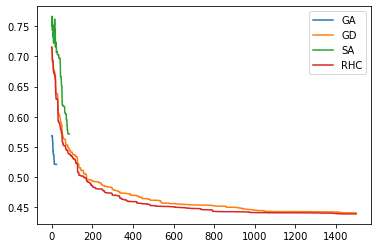

In [34]:
plt.plot(mga.fitness_curve, label='GA')
plt.plot(mgd.fitness_curve, label='GD')
plt.plot(msa.fitness_curve, label='SA')
plt.plot(mrhc.fitness_curve, label='RHC')
plt.legend()